In [136]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt

try:
    from probml_utils import latexify, savefig, is_latexify_enabled
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, savefig, is_latexify_enabled

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

In [170]:
# Now use 2 features and all 3 classes
x = iris["data"][::3, (2, 3)]  # petal length, petal width
y = iris["target"][::3]

# softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="none")
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=1, random_state=42)
softmax_reg.fit(x, y)

x0, x1 = jnp.meshgrid(
    jnp.linspace(0.5, 7.5, 500),
    jnp.linspace(-1, 4, 200),
)
x_new = jnp.c_[x0.ravel(), x1.ravel()]


In [171]:
x.shape

(50, 2)

In [172]:
x_new

DeviceArray([[ 0.5       , -1.        ],
             [ 0.5140281 , -1.        ],
             [ 0.52805614, -1.        ],
             ...,
             [ 7.471944  ,  4.        ],
             [ 7.485972  ,  4.        ],
             [ 7.5       ,  4.        ]], dtype=float32)

In [173]:
y_proba = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)

In [174]:
y_proba.shape

(100000, 3)

In [175]:
y_predict.shape

(100000,)

In [176]:
zz_prob = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

In [177]:
zz.shape

(200, 500)

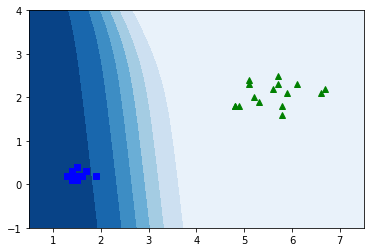

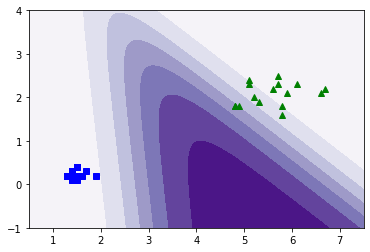

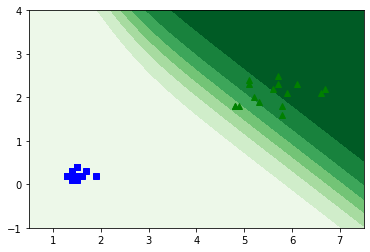

In [178]:
cmaps = ['Blues', 'Purples', 'Greens']

for i in range(3):
    plt.figure()
    plt.plot(x[y == 2, 0], x[y == 2, 1], "g^", label="Iris-Virginica")
    # plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
    # plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color='k', label="Iris-Versicolor")
    plt.plot(x[y == 0, 0], x[y == 0, 1], "bs", label="Iris-Setosa")
    zz_prob = y_proba[:, i].reshape(x0.shape)
    plt.contourf(x0, x1, zz_prob, cmap=cmaps[i])

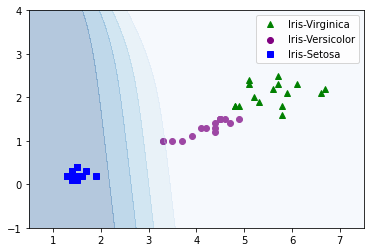

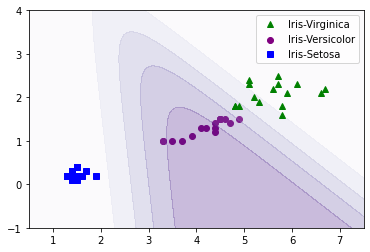

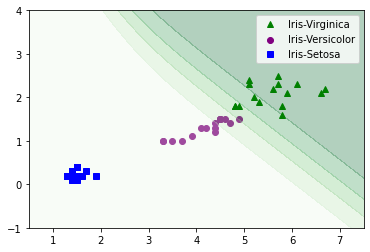

In [179]:
cmaps = ['Blues', 'Purples', 'Greens']



for i in range(3):
    plt.figure()
    plt.plot(x[y == 2, 0], x[y == 2, 1], "g^", label="Iris-Virginica")
    # plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
    # plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color="purple", label="Iris-Versicolor")
    plt.plot(x[y == 0, 0], x[y == 0, 1], "bs", label="Iris-Setosa")
    zz_prob = y_proba[:, i].reshape(x0.shape)
    plt.contourf(x0, x1, zz_prob, cmap=cmaps[i], alpha=0.3, levels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.legend()

In [186]:
x0

DeviceArray([[0.5       , 0.5140281 , 0.52805614, ..., 7.471944  ,
              7.485972  , 7.5       ],
             [0.5       , 0.5140281 , 0.52805614, ..., 7.471944  ,
              7.485972  , 7.5       ],
             [0.5       , 0.5140281 , 0.52805614, ..., 7.471944  ,
              7.485972  , 7.5       ],
             ...,
             [0.5       , 0.5140281 , 0.52805614, ..., 7.471944  ,
              7.485972  , 7.5       ],
             [0.5       , 0.5140281 , 0.52805614, ..., 7.471944  ,
              7.485972  , 7.5       ],
             [0.5       , 0.5140281 , 0.52805614, ..., 7.471944  ,
              7.485972  , 7.5       ]], dtype=float32)

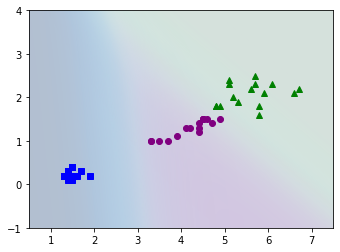

In [199]:
cmaps = ['Blues', 'Purples', 'Greens']



i =2

plt.plot(x[y == 2, 0], x[y == 2, 1], "g^", label="Iris-Virginica")
# plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
# plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")
plt.scatter(x[y == 1, 0], x[y == 1, 1], color="purple", label="Iris-Versicolor")
plt.plot(x[y == 0, 0], x[y == 0, 1], "bs", label="Iris-Setosa")
#plt.contourf(x0, x1, zz_prob, cmap=cmaps[i], alpha=0.3, levels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.imshow(y_proba[:, i].reshape(x0.shape), extent=[x0.min(), x0.max(), x1.min(), x1.max()], origin='lower',
           cmap=cmaps[i], alpha=0.3, interpolation='antialiased')
plt.imshow(y_proba[:, i-1].reshape(x0.shape), extent=[x0.min(), x0.max(), x1.min(), x1.max()], origin='lower',
           cmap=cmaps[i-1], alpha=0.3, interpolation='antialiased')
plt.imshow(y_proba[:, i-2].reshape(x0.shape), extent=[x0.min(), x0.max(), x1.min(), x1.max()], origin='lower',
           cmap=cmaps[i-2], alpha=0.3, interpolation='antialiased')
#plt.contourf(x0, x1, y_proba[:, i-1].reshape(x0.shape), cmap=cmaps[i-1], alpha=0.3, levels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
#plt.contourf(x0, x1, y_proba[:, i-2].reshape(x0.shape), cmap=cmaps[i-2], alpha=0.3, levels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

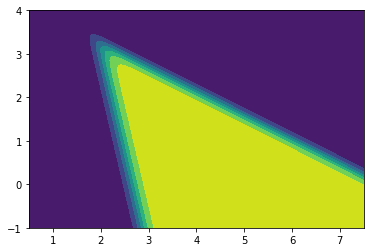

In [95]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()
X = iris.data[:, 2:]
iris.target[iris.target == 1] = 0
iris.target

classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict_proba",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
     alpha=0.5, cmap='viridis')
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.colorbar(disp.surface_)

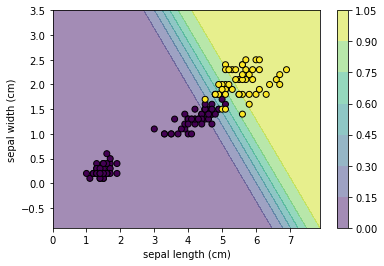

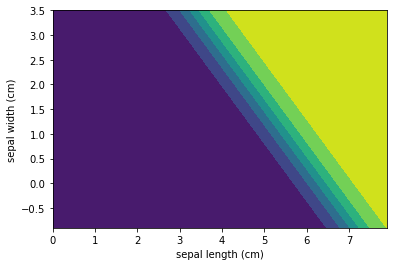

In [104]:
disp.plot()

In [ ]:
import matplotlib.pyplot as plt
>>> from sklearn.datasets import load_iris
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.inspection import DecisionBoundaryDisplay
>>> iris = load_iris()
>>> X = iris.data[:, :2]
>>> classifier = LogisticRegression().fit(X, iris.target)
>>> disp = DecisionBoundaryDisplay.from_estimator(
...     classifier, X, response_method="predict",
...     xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
...     alpha=0.5,
... )
>>> disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
<...>
>>> plt.show()